In [ ]:
# Latent Factor Model
# Project 4
# Author: Yonghwan Kim A11746276
# Team members: Yonghwan Kim, Sangeon Park

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import csv
import numpy as np
import collections
import copy
import os,sys,humanize,psutil
import matplotlib.pyplot as plt
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# RMSE funtion
def RMSE(y_actual, y_predicted):
    rms = sqrt(mean_squared_error(y_actual, y_predicted))
    return round(rms,4)

In [ ]:
k = 25 # factor, best case: k = 100
lmbda = 0.1 # regularization parameter
mu = 0.1 # learning rate
iter = 40 # number of iterations
m = 1682 # items
n = 943 # users

# 943 users
# 1682 items
# Initialization of P and Q:
p = np.random.default_rng().uniform(0, np.sqrt(5/k), [m,k]) # P and Q to random values in [0,sqrt(5/𝑘)] # 1682 * 25
q = np.random.default_rng().uniform(0, np.sqrt(5/k), [n,k]) # 943 * 25

training_dataset_dir = '/content/drive/MyDrive/training_dataset.csv'
# Update equations

list_of_errors = []

# 40 iterations
for number in range(iter):
    # Open file
    with open(training_dataset_dir) as trdd:
        # read from disk
        csv_reader = csv.reader(trdd, delimiter=',')
        line_count = 0
        sum_rpq_sq = 0
        sum_sq_px = 0
        sum_sq_qi = 0
        for row in csv_reader:
            # header
            if line_count == 0:
                line_count += 1
            # data
            else:
                # user ID row[0], item ID row[1], rating row[2]
                x = int(row[1]) # item
                i = int(row[0]) # user
                r_xi = int(row[2]) # training rating
                p_x = p[x-1] # l2norm
                q_i = q[i-1] # l2norm
                dt = np.dot(p_x, q_i) # dot product of px * qiT
                rpq = r_xi - dt # rxi - px*qiT
                px_rxi = (-1 * rpq * q_i) + (lmbda * p_x) # partial derivatives
                qi_rxi = (-1 * rpq * p_x) + (lmbda * q_i) # partial derivatives
                # update p and q
                p[x-1] = p[x-1] - mu * px_rxi
                q[i-1] = q[i-1] - mu * qi_rxi
                # for E function
                sum_rpq_sq = sum_rpq_sq + rpq ** 2
                # sum of square The L2 norm that is calculated as the square root of the sum of the squared vector values.
                sum_sq_px = sum_sq_px + np.sum(p_x**2)
                sum_sq_qi = sum_sq_qi + np.sum(q_i**2)
        error_function = sum_rpq_sq + lmbda * (sum_sq_px + sum_sq_qi)
        list_of_errors.append(error_function)

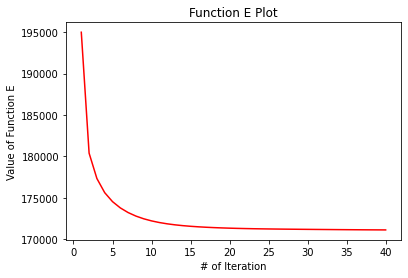

In [ ]:
# plot of function E
t = range(1,iter+1)
# plot with data function E
plt.plot(t, list_of_errors, color='r')
# plot title
plt.title("Function E Plot")
# plot y label
plt.ylabel("Value of Function E")
# plot x label
plt.xlabel("# of Iteration")

plt.show()

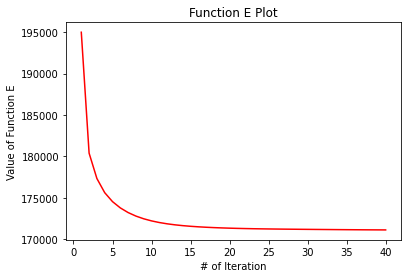

In [ ]:
# compute prediction value
qT = np.transpose(q)
# prediction value matrix
r_mat = np.dot(p, qT)

list_of_prediction = []
list_of_realdata = []
# read test_dataset to calculate accuracy
test_dataset_dir = '/content/drive/MyDrive/test_dataset.csv'
# For rmse accuracy test
# Open file
with open(test_dataset_dir) as tdd:
    # read as csv
    csv_reader = csv.reader(tdd, delimiter=',')
    line_count = 0
    for row in csv_reader:
        # header
        if line_count == 0:
            line_count += 1
        # data
        else:
            list_of_realdata.append(int(row[2]))
            list_of_prediction.append(r_mat[int(row[1])-1][int(row[0])-1])
            line_count += 1
# RMSE
latent_factor_rmse = RMSE(list_of_realdata, list_of_prediction)
print(f'Latent Factor Model, RMSE: {latent_factor_rmse}')

Latent Factor Model, RMSE: 1.1139


Latent Factor Model, RMSE: 1.0845 with K factor > 100

Latent Factor Model, RMSE: 1.1139 with K factor = 25

# Compare and contrast results from CF.py and LF.py

Our final RMSE result shows that CF with interpolation weight is 1.3295
and RMSE result for LF is 1.1139.

The reason we think LF performs better than CF is that LF does not rely on the nature of the relationship of each items, instead it uses factor to predict the ratings. The problem of item-item collaborating is that if we are tring to predict the rating of a movie that has not been rated by any other users, it won't be able to use any base similar models to predict the rating. Also, if there are not enough similar items to use, the prediction won't be accurate as well. The given dataset we have used have abundent of similarity score that is lower than 0.5 and 10 of items were not be able to find any items from training dataset to train. Because Latent patern model can predict any rating regardless of relationship of each items or relationship of each users, it showed better accuracy. 

For the sense of convergence, both model has fast convergence rate but CF had significant speed of convergence compare to LF model. We gave the learning rate for CF as 0.0005 and LF as 0.1. CF had slower learning rate though converged faster than LF had faster learning rate. 

# Participation Report

# Collaborative Filtering Model:

Similarity: Sangeon Park, Yonghwan Kim

SGD: Sangeon Park, Yonghwan Kim

Compute J(w): Sangeon Park

Plot: Sangeon Park

RMSE: Sangeon Park



# Latent Factor Model: 

SGD: Yonghwan Kim

Compute E: Yonghwan Kim

Plot: Yonghwan Kim

RMSE: Yonghwan Kim
